### Downloading the data

In [2]:
import pandas as pd
xls = pd.ExcelFile('/Users/emanuelciudin/Documents/development/Advanced_ML/Advanced_ML_data.xlsx')
aapl_stock = pd.read_excel(xls, 'APPL Stock')
meta_stock = pd.read_excel(xls, 'Meta Stock')
tesla_stock = pd.read_excel(xls, 'Tesla Stock')
amzn_stock = pd.read_excel(xls, 'AMZN Stock')
nvda_stock = pd.read_excel(xls, 'NVDA Stock')
goog_stock = pd.read_excel(xls, 'Alphabet Stock')
adobe_stock = pd.read_excel(xls, 'Adobe Stock')
visa_stock = pd.read_excel(xls, 'Visa Stock')
netflix_stock = pd.read_excel(xls, 'Netflix Stock')
msft_stock = pd.read_excel(xls, 'MSFT Stock')

copper_futures = pd.read_excel(xls, 'Copper 1 month futures')
gold_futures = pd.read_excel(xls, 'Gold 1 Month Futures')

aapl_stock.rename(columns = {"AAPL US Equity - Closing Price 1 Day Ago" : "closing_price", "AAPL US Equity - Volume": "daily_volume"}, inplace = True)
meta_stock.rename(columns = {"META US Equity - Closing Price 1 Day Ago" : "closing_price", "META US Equity - Volume": "daily_volume"}, inplace = True)
tesla_stock.rename(columns = {"TSLA US Equity - Closing Price 1 Day Ago" : "closing_price", "TSLA US Equity - Volume": "daily_volume"}, inplace = True)
amzn_stock.rename(columns = {"AMZN US Equity - Closing Price 1 Day Ago" : "closing_price", "AMZN US Equity - Volume": "daily_volume"}, inplace = True)
nvda_stock.rename(columns = {"NVDA US Equity - Closing Price 1 Day Ago" : "closing_price", "NVDA US Equity - Volume": "daily_volume"}, inplace = True)
goog_stock.rename(columns = {"GOOGL US Equity - Closing Price 1 Day Ago" : "closing_price", "GOOGL US Equity - Volume": "daily_volume"}, inplace = True)
adobe_stock.rename(columns = {"ADBE US Equity - Closing Price 1 Day Ago" : "closing_price", "ADBE US Equity - Volume": "daily_volume"}, inplace = True)
visa_stock.rename(columns = {"V US Equity - Closing Price 1 Day Ago" : "closing_price", "V US Equity - Volume": "daily_volume"}, inplace = True)
netflix_stock.rename(columns = {"NFLX US Equity - Closing Price 1 Day Ago" : "closing_price", "NFLX US Equity - Volume": "daily_volume"}, inplace = True)
msft_stock.rename(columns = {"MSFT US Equity - Closing Price 1 Day Ago" : "closing_price", "MSFT US Equity - Volume": "daily_volume"}, inplace = True)
copper_futures.rename(columns = {"HG1 Comdty - Closing Price 1 Day Ago" : "copper_closing_price", "HG1 Comdty - Volume": "copper_daily_volume"}, inplace = True)
gold_futures.rename(columns = {"Volume  (L1)" : "gold_daily_volume", "Closing Price 1 Day Ago  (R1)": "gold_closing_price"}, inplace = True)
gold_futures = gold_futures.reindex(columns = ['Date', 'gold_closing_price', 'gold_daily_volume'])

aapl_stock['Date'] = pd.to_datetime(aapl_stock['Date'])
meta_stock['Date'] = pd.to_datetime(meta_stock['Date'])
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])
amzn_stock['Date'] = pd.to_datetime(amzn_stock['Date'])
nvda_stock['Date'] = pd.to_datetime(nvda_stock['Date'])
goog_stock['Date'] = pd.to_datetime(goog_stock['Date'])
adobe_stock['Date'] = pd.to_datetime(adobe_stock['Date'])
visa_stock['Date'] = pd.to_datetime(visa_stock['Date'])
netflix_stock['Date'] = pd.to_datetime(netflix_stock['Date'])
msft_stock['Date'] = pd.to_datetime(msft_stock['Date'])

copper_futures['Date'] = pd.to_datetime(copper_futures['Date'])
gold_futures['Date'] = pd.to_datetime(gold_futures['Date'])

display(gold_futures.head())

print(f"the length of the apple stock dataframe is: {len(aapl_stock)}")
print(f"the length of the meta stock dataframe is: {len(meta_stock)}")
print(f"the length of the tesla stock dataframe is: {len(tesla_stock)}")
print(f"the length of the amazon stock dataframe is: {len(amzn_stock)}")
print(f"the length of the nvidia stock dataframe is: {len(nvda_stock)}")
print(f"the length of the google stock dataframe is: {len(goog_stock)}")
print(f"the length of the adobe stock dataframe is: {len(adobe_stock)}")
print(f"the length of the visa stock dataframe is: {len(visa_stock)}")
print(f"the length of the netflix stock dataframe is: {len(netflix_stock)}")
print(f"the length of the microsoft stock dataframe is: {len(msft_stock)}")

print(f"the length of the copper futures dataframe is: {len(copper_futures)}")
print(f"the length of the gold futures dataframe is: {len(gold_futures)}")

Date  gold_closing_price  gold_daily_volume
0 2024-02-21              2027.5               10.0
1 2024-02-20              2011.5             1326.0
2 2024-02-16              2002.1               32.0
3 2024-02-15              1990.3              286.0
4 2024-02-14              1992.9             1916.0

the length of the apple stock dataframe is: 2047
the length of the meta stock dataframe is: 2047
the length of the tesla stock dataframe is: 2047
the length of the amazon stock dataframe is: 2047
the length of the nvidia stock dataframe is: 2047
the length of the google stock dataframe is: 2047
the length of the adobe stock dataframe is: 2047
the length of the visa stock dataframe is: 2047
the length of the netflix stock dataframe is: 2047
the length of the microsoft stock dataframe is: 2047
the length of the copper futures dataframe is: 2050
the length of the gold futures dataframe is: 2050


### Dropping Nan Values and Checking Dates

In [3]:
display(aapl_stock.head())

# Search which date is missing from the apple stock dataframe compared to the copper futures dataframe

missing_dates = copper_futures[~copper_futures['Date'].isin(visa_stock['Date'])]
print(missing_dates)

# Search which date is missing from the apple stock dataframe compared to the gold futures dataframe

missing_dates = gold_futures[~gold_futures['Date'].isin(aapl_stock['Date'])]
print(missing_dates)

# Drop the rows with those dates from the gold and copper dataframes

gold_futures = gold_futures[~gold_futures['Date'].isin(missing_dates['Date'])]
copper_futures = copper_futures[~copper_futures['Date'].isin(missing_dates['Date'])]

print(f"the length of the copper futures dataframe is: {len(copper_futures)}")
print(f"the length of the gold futures dataframe is: {len(gold_futures)}")

# Check for NaN values in the apple stock dataframe

print(aapl_stock.isnull().sum())

# Check that all dates are present in all 10 stock dataframes plus the 2 commodities dataframes

print(aapl_stock['Date'].isin(meta_stock['Date']).value_counts())
print(aapl_stock['Date'].isin(tesla_stock['Date']).value_counts())
print(aapl_stock['Date'].isin(amzn_stock['Date']).value_counts())
print(aapl_stock['Date'].isin(nvda_stock['Date']).value_counts())
print(aapl_stock['Date'].isin(goog_stock['Date']).value_counts())
print(aapl_stock['Date'].isin(adobe_stock['Date']).value_counts())
print(aapl_stock['Date'].isin(visa_stock['Date']).value_counts())
print(aapl_stock['Date'].isin(netflix_stock['Date']).value_counts())
print(aapl_stock['Date'].isin(msft_stock['Date']).value_counts())
print(aapl_stock['Date'].isin(copper_futures['Date']).value_counts())
print(aapl_stock['Date'].isin(gold_futures['Date']).value_counts())

display(gold_futures.head())


Date  closing_price  daily_volume
0 2024-02-21         181.56       9618940
1 2024-02-20         182.31      53665552
2 2024-02-16         183.86      49752464
3 2024-02-15         184.15      65434496
4 2024-02-14         185.04      54630516

           Date  copper_closing_price  copper_daily_volume
219  2023-04-07                401.55                  NaN
727  2021-04-02                399.05                  NaN
1312 2018-12-05                275.90               1186.0
           Date  gold_closing_price  gold_daily_volume
219  2023-04-07              2011.9                NaN
727  2021-04-02              1726.5                NaN
1312 2018-12-05              1241.1              125.0
the length of the copper futures dataframe is: 2047
the length of the gold futures dataframe is: 2047
Date             0
closing_price    0
daily_volume     0
dtype: int64
Date
True    2047
Name: count, dtype: int64
Date
True    2047
Name: count, dtype: int64
Date
True    2047
Name: count, dtype: int64
Date
True    2047
Name: count, dtype: int64
Date
True    2047
Name: count, dtype: int64
Date
True    2047
Name: count, dtype: int64
Date
True    2047
Name: count, dtype: int64
Date
True    2047
Name: count, dtype: int64
Date
True    2047
Na

Date  gold_closing_price  gold_daily_volume
0 2024-02-21              2027.5               10.0
1 2024-02-20              2011.5             1326.0
2 2024-02-16              2002.1               32.0
3 2024-02-15              1990.3              286.0
4 2024-02-14              1992.9             1916.0

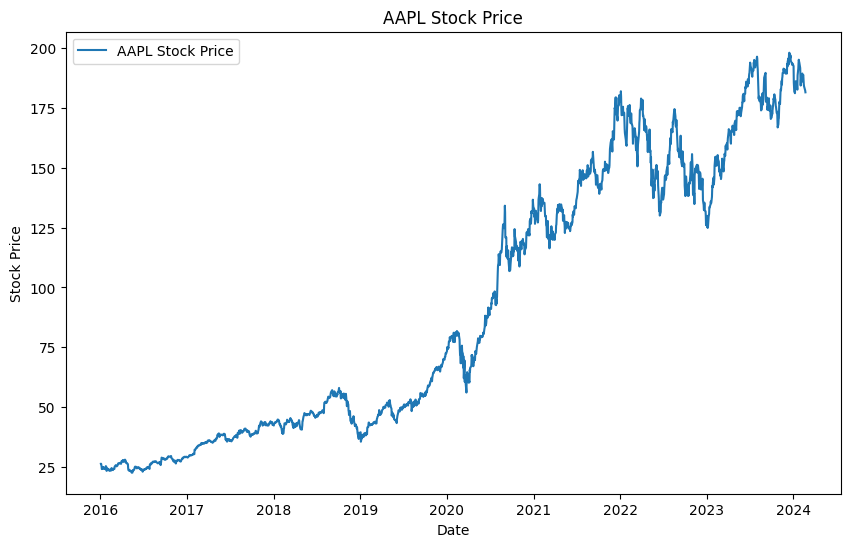

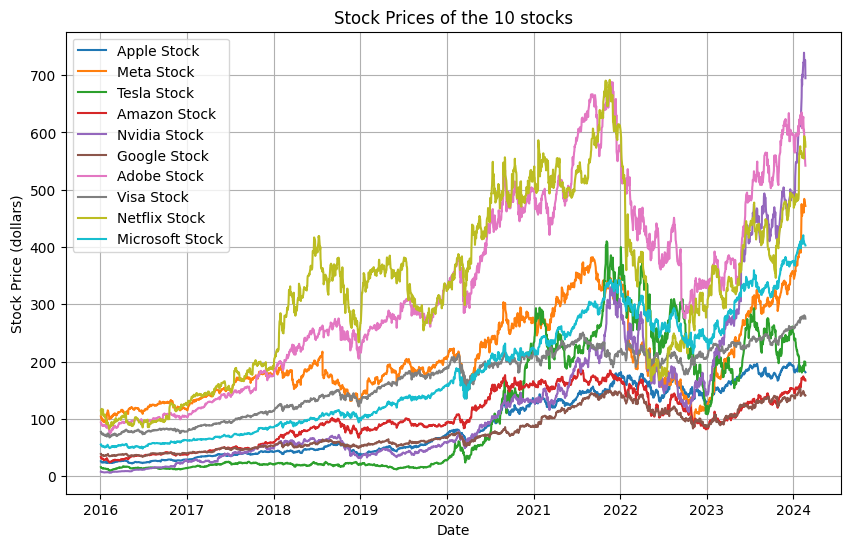

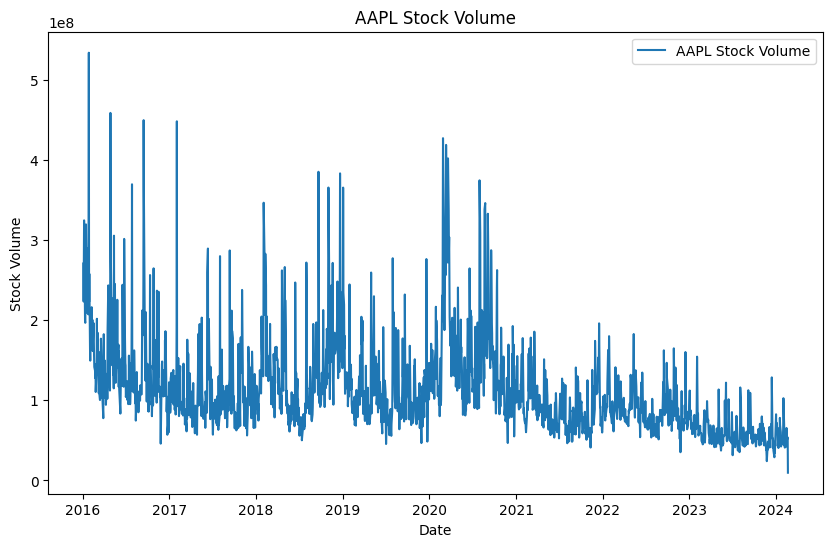

In [4]:
# Plotting the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(aapl_stock['Date'], aapl_stock['closing_price'], label='AAPL Stock Price')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

plt.show()

# Plot in a for all 10 stocks

stocks = [aapl_stock, meta_stock, tesla_stock, amzn_stock, nvda_stock, goog_stock, adobe_stock, visa_stock, netflix_stock, msft_stock]
names = ['Apple Stock', 'Meta Stock', 'Tesla Stock', 'Amazon Stock', 'Nvidia Stock', 'Google Stock', 'Adobe Stock', 'Visa Stock', 'Netflix Stock', 'Microsoft Stock']

plt.figure(figsize=(10, 6))
for i in range(len(stocks)):
    plt.plot(stocks[i]['Date'], stocks[i]['closing_price'], label=names[i])
plt.title('Stock Prices of the 10 stocks')
plt.xlabel('Date')
plt.grid(True)
plt.ylabel('Stock Price (dollars)')
plt.legend()

plt.show()

# Plotting the volume

plt.figure(figsize=(10, 6))
plt.plot(aapl_stock['Date'], aapl_stock['daily_volume'], label='AAPL Stock Volume')
plt.title('AAPL Stock Volume')
plt.xlabel('Date')
plt.ylabel('Stock Volume')
plt.legend()

plt.show()

### Stationarity Test

In [27]:
# Perform stationarity test on the closing price, output what the conclusion is

from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

def adfuller_test(time_series, alpha):
    # Perform Augmented Dickey-Fuller test with the library function
    result = adfuller(time_series['copper_closing_price'])

    # Extract results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Printing the results
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')
    
    # Compare p-value with significance level (alpha)
    if p_value > alpha:
        print(f'Result: Fail to reject the null hypothesis (H0). The time series may not be stationary.')
    else:
        print(f'Result: Reject the null hypothesis (H0). The time series is stationary.')

adfuller_test(copper_futures, 0.05)


ADF Statistic: -1.092582480243496
p-value: 0.7180208432749526
Critical Values: {'1%': -3.4335627358346366, '5%': -2.862959228246899, '10%': -2.567525534009848}
Result: Fail to reject the null hypothesis (H0). The time series may not be stationary.


### Calculating statistics used for labelling (buy/hold/sell)

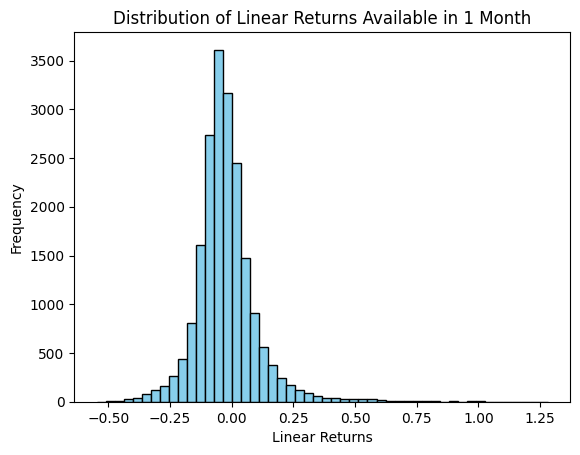

Mean: -0.021960953785730115
Standard Deviation: 0.12527515117484567
Mean +/- Standard Deviation: -0.1472361049605758 to 0.10331419738911556
Mean Apple: -0.025795226095902506
Standard Deviation Apple: 0.09555523444794407
Mean +/- Standard Deviation Apple: -0.12135046054384657 to 0.06976000835204157


In [5]:
import matplotlib.pyplot as plt

def calculate_future_returns_for_labelling(timeseries):
    returns = []
    for i in range(35, len(timeseries) - 35):
        average_term = sum(timeseries['closing_price'].iloc[i + 25:i + 35]) / 10
        returns_term = (average_term - timeseries['closing_price'].iloc[i])/timeseries['closing_price'].iloc[i]
        returns.append(returns_term)
    return returns

returns_appl = calculate_future_returns_for_labelling(aapl_stock)
returns_meta = calculate_future_returns_for_labelling(meta_stock)
returns_tesla = calculate_future_returns_for_labelling(tesla_stock)
returns_amzn = calculate_future_returns_for_labelling(amzn_stock)
returns_nvda = calculate_future_returns_for_labelling(nvda_stock)
returns_goog = calculate_future_returns_for_labelling(goog_stock)
returns_adobe = calculate_future_returns_for_labelling(adobe_stock)
returns_visa = calculate_future_returns_for_labelling(visa_stock)
returns_netflix = calculate_future_returns_for_labelling(netflix_stock)
returns_msft = calculate_future_returns_for_labelling(msft_stock)

returns = returns_appl + returns_meta + returns_tesla + returns_amzn + returns_nvda + returns_goog + returns_adobe + returns_visa + returns_netflix + returns_msft

plt.hist(returns, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Linear Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Linear Returns Available in 1 Month')
# plt.grid(True)
plt.show()


# Calculate mean and standard dev and output the results and also the mean+/-std what is the percentage
import numpy as np
from scipy.stats import skew

def stock_statistics(returns):
    mean = np.mean(returns)
    std = np.std(returns)
    skewness = skew(returns)
    return mean, std, skewness

mean, std, skewness = stock_statistics(returns)

print(f'Mean: {mean}')
print(f'Standard Deviation: {std}')
print(f'Mean +/- Standard Deviation: {mean - std} to {mean + std}')

mean_appl, std_appl, skewness_appl = stock_statistics(returns_appl)
print(f'Mean Apple: {mean_appl}')
print(f'Standard Deviation Apple: {std_appl}')
print(f'Mean +/- Standard Deviation Apple: {mean_appl - std_appl} to {mean_appl + std_appl}')


Number of buys: 2593 which is 13.115832068791097% of the returns
Number of holds: 5935 which is 30.020232675771368% of the returns
Number of sells: 11242 which is 56.86393525543754% of the returns
Sum of buy, holds, sell is equal to the length of the returns: 19770 and the length of the returns is: 19770
A sample is a buy if the return is higher than: 8.263757558742284%
A sample is a hold if the return is between minus risk free rate and the minimum buy return: -2.0% and 8.263757558742284%
A sample is a sell if the return is lower than minus the risk free rate: -2.0%


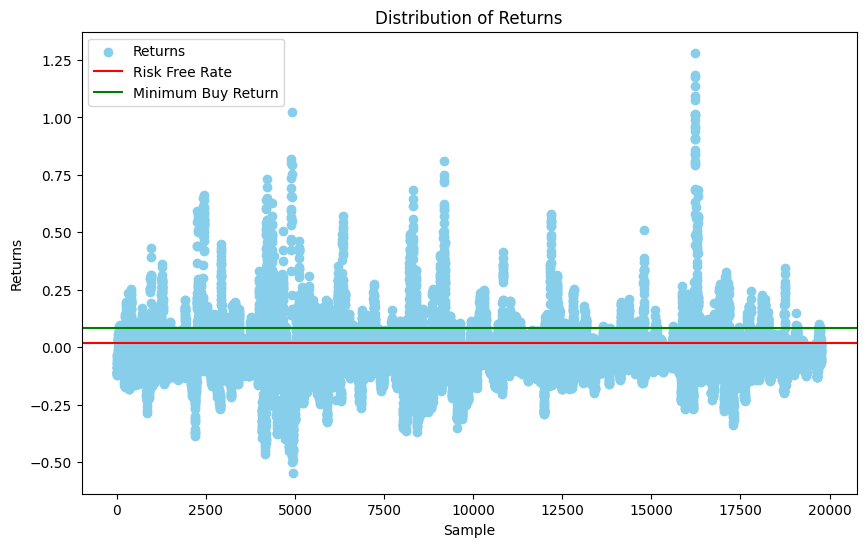

In [6]:
# Formula of Sharpe ratio is (mean_return - risk free rate) / std
# The risk free rate was taken as 2% to represent an average of the values in the past 8 years in which the data was recorded
# This classifies returns with sharpe ratio higher than 1 as a buy, between 0 and 1 as a hold and below 0 as a sell
def returns_statistics(returns, risk_free_rate = 0.02, buy_sharpe_ratio=0.5):
    _, std, _ = stock_statistics(returns)
    minimum_buy_return = risk_free_rate + (buy_sharpe_ratio * std)
    # sharpe ratio equals to 0 only if the returns are equal to the risk free rate, thus hold is 1 to (0-transaction fees)
    buys = sum(1 for i in returns if i > minimum_buy_return)
    holds = sum(1 for i in returns if i >= -risk_free_rate  and i <= minimum_buy_return)
    sells = sum(1 for i in returns if i < -risk_free_rate)
    return buys, holds, sells, minimum_buy_return, risk_free_rate

buys, holds, sells, minimum_buy_return, risk_free_rate = returns_statistics(returns)
print(f'Number of buys: {buys} which is {buys / len(returns) * 100}% of the returns')
print(f'Number of holds: {holds} which is {holds / len(returns) * 100}% of the returns')
print(f'Number of sells: {sells} which is {sells / len(returns) * 100}% of the returns')
print(f'Sum of buy, holds, sell is equal to the length of the returns: {buys + holds + sells} and the length of the returns is: {len(returns)}')
print(f'A sample is a buy if the return is higher than: {minimum_buy_return*100}%')
print(f'A sample is a hold if the return is between minus risk free rate and the minimum buy return: {-risk_free_rate*100}% and {minimum_buy_return*100}%')
print(f'A sample is a sell if the return is lower than minus the risk free rate: {-risk_free_rate*100}%')

# plot a scatter plot of the distribution of the 3 classes buy, hold, sell, make it obvious which is which, specify that under risk free rate is a sell, between risk free rate and minimum buy return is a hold and above minimum buy return is a buy

import matplotlib.pyplot as plt

def plot_returns(returns, minimum_buy_return, risk_free_rate):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(returns)), returns, color='skyblue')
    plt.axhline(y=risk_free_rate, color='r', linestyle='-')
    plt.axhline(y=minimum_buy_return, color='g', linestyle='-')
    plt.title('Distribution of Returns')
    plt.xlabel('Sample')
    plt.ylabel('Returns')
    plt.legend(['Returns', 'Risk Free Rate', 'Minimum Buy Return'])
    plt.show()

plot_returns(returns, minimum_buy_return, risk_free_rate)

### Labelling data

In [7]:
from statsmodels.tsa.stattools import adfuller

def adding_log_returns(dataframe): # Add log returns to the dataframe
    dataframe['log_returns'] = np.log(dataframe['closing_price'] / dataframe['closing_price'].shift(1))
    # Test log returns for stationarity by comparing it to a p_value of 0.05
    result = adfuller(dataframe['log_returns'].dropna())
    
    if result[1] > 0.05:
        print('The log returns are not stationary')
    return dataframe

def adding_SMA_first_difference(dataframe, window): # Add the first difference of the SMA to the dataframe
    SMA = dataframe['closing_price'].rolling(window=window).mean()
    dataframe['SMA_first_difference'] = SMA - SMA.shift(1)
    # Test the first difference of the SMA for stationarity by comparing it to a p_value of 0.05
    result = adfuller(dataframe['SMA_first_difference'].dropna())

    if result[1] > 0.05:
        print('The first difference of the SMA is not stationary')
    return dataframe

def adding_futures_to_stock(dataframe, futures_dataframe): # Merge the futures dataframe with the stock dataframe
    dataframe = dataframe.merge(futures_dataframe, how='inner', on='Date')
    return dataframe

def adding_futures_copper_log_returns(dataframe, futures_dataframe): # Add log returns of the copper futures to the dataframe
    dataframe['copper_log_returns'] = np.log(futures_dataframe['copper_closing_price'] / futures_dataframe['copper_closing_price'].shift(1))
    # Test log returns for stationarity by comparing it to a p_value of 0.05
    result = adfuller(dataframe['copper_log_returns'].dropna())

    if result[1] > 0.05:
        print('The log returns of the copper futures are not stationary')
    return dataframe

def adding_futures_gold_log_returns(dataframe, futures_dataframe): # Add log returns of the gold futures to the dataframe
    dataframe['gold_log_returns'] = np.log(futures_dataframe['gold_closing_price'] / futures_dataframe['gold_closing_price'].shift(1))
    # Test log returns for stationarity by comparing it to a p_value of 0.05
    result = adfuller(dataframe['gold_log_returns'].dropna())
    if result[1] > 0.05:
        print('The log returns of the gold futures are not stationary')
    return dataframe

def main(dataframe, copper_futures, gold_futures, minimum_sharpe_ratio=0.5, risk_free_rate=0.02, std = 0.12524877828196412):
# making a main function to call all the other functions and return the X and Y dataframes
    df = adding_log_returns(dataframe=dataframe)
    df = adding_SMA_first_difference(dataframe=df, window=30)
    df = adding_futures_to_stock(dataframe=df, futures_dataframe=copper_futures)
    df = adding_futures_to_stock(dataframe=df, futures_dataframe=gold_futures)
    df = adding_futures_copper_log_returns(dataframe=df, futures_dataframe=copper_futures)
    df = adding_futures_gold_log_returns(dataframe=df, futures_dataframe=gold_futures)

    # Delete rows which contains NaN values
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # Create X and Y dataframes
    X = []
    Y = []
    for i in range(len(df) - 35):
        X_sample = df.iloc[i:i+30].copy()
        # Calculating the returns to assign X and Y
        average_term = sum(df['closing_price'].iloc[i + 25:i + 35]) / 10
        returns_term = (average_term - df['closing_price'].iloc[i])/df['closing_price'].iloc[i]
        minimum_buy_return = risk_free_rate + (minimum_sharpe_ratio * std)

        # BUY = 2 HOLD = 1 SELL = 0
        if returns_term > minimum_buy_return:
            y_sample = 2 # BUY
        elif returns_term > -risk_free_rate and returns_term < minimum_buy_return:
            y_sample = 1 # HOLD
        else:
            y_sample = 0 # SELL
        
        # Dropping unwanted collumns from the X dataframe
        X_sample.drop(columns=['Date', 'closing_price', 'gold_closing_price', 'copper_closing_price'], inplace=True)
        X_sample = X_sample[['log_returns', 'daily_volume', 'SMA_first_difference', 'copper_log_returns', 'copper_daily_volume', 'gold_log_returns', 'gold_daily_volume']]
        X_sample.reset_index(drop=True, inplace=True)
        
        # Checking matrices
        if X_sample.isnull().sum().sum() != 0:
            print("There are still NaN values in the X dataframe. Please check the code!")

        X.append(X_sample)
        Y.append(y_sample)
    
    return X,Y, df
    

In [8]:
X_apple, Y_apple, _ = main(aapl_stock, copper_futures, gold_futures)
X_meta, Y_meta, _ = main(meta_stock, copper_futures, gold_futures)
X_tesla, Y_tesla, _ = main(tesla_stock, copper_futures, gold_futures)
X_amazon, Y_amazon, _ = main(amzn_stock, copper_futures, gold_futures)
X_nvidia, Y_nvidia, _ = main(nvda_stock, copper_futures, gold_futures)
X_google, Y_google, _ = main(goog_stock, copper_futures, gold_futures)
X_adobe, Y_adobe, _ = main(adobe_stock, copper_futures, gold_futures)
X_visa, Y_visa, _ = main(visa_stock, copper_futures, gold_futures)
X_netflix, Y_netflix, _ = main(netflix_stock, copper_futures, gold_futures)
X_microsoft, Y_microsoft, _ = main(msft_stock, copper_futures, gold_futures)

print(np.array(X_apple).shape)
# Merge the dataframes without losing the order of the samples so that the X and Y dataframes are still in the same order

X = X_apple + X_meta + X_tesla + X_amazon + X_nvidia + X_google + X_adobe + X_visa + X_netflix + X_microsoft
Y = Y_apple + Y_meta + Y_tesla + Y_amazon + Y_nvidia + Y_google + Y_adobe + Y_visa + Y_netflix + Y_microsoft

print(X[2000])
print(f'Number of buys: {sum(1 for i in Y if i == 2)}')
print(f'Number of holds: {sum(1 for i in Y if i == 1)}')
print(f'Number of sells: {sum(1 for i in Y if i == 0)}')

(1977, 30, 7)
    log_returns  daily_volume  SMA_first_difference  copper_log_returns  \
0      0.014888      19037080             -1.451667            0.024721   
1      0.007148      15276375             -1.343667           -0.026417   
2      0.015318      23146388             -1.409667           -0.011294   
3      0.020233      16024497             -1.022667            0.003691   
4     -0.012736      12637245             -1.192333           -0.011114   
5      0.010492      15684454             -0.640000            0.008215   
6      0.009592       5467488             -0.572333           -0.006886   
7     -0.013295      10715177             -0.499000            0.013069   
8      0.008834      12027863             -0.238333            0.000393   
9     -0.014607      16976128             -0.314333           -0.019994   
10    -0.002540      14519213             -0.403333           -0.009676   
11    -0.004438      18932572             -0.708333            0.004312   
12     0.01

### Calculating the correlation matrix for the Apple Stock between features


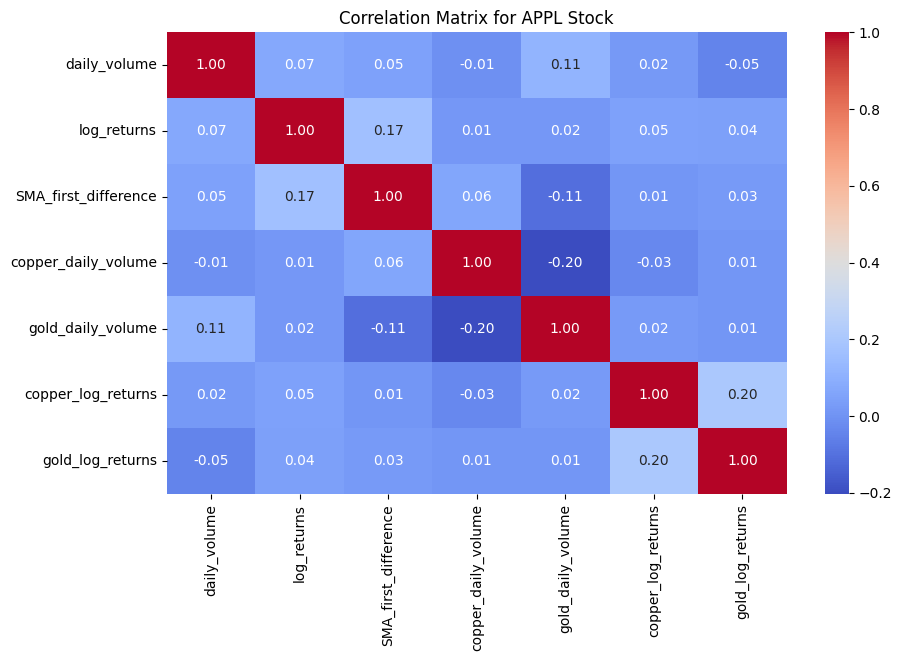

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # Trb sa returnez df_ul la functia main ca sa mearga functia asta
def plot_correlation_matrix(dataframe, title):
    X, Y, df = main(dataframe, copper_futures, gold_futures)
    df.drop(columns=['Date', 'closing_price', 'gold_closing_price', 'copper_closing_price'], inplace=True)
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Matrix for {title}')
    plt.show()

# stock_list = [aapl_stock, meta_stock, tesla_stock, amzn_stock, nvda_stock, goog_stock, adobe_stock, visa_stock, netflix_stock, msft_stock]
# for i in range(0, 10):
#     plot_correlation_matrix(stock_list[i], f'Stock {i+1}')

plot_correlation_matrix(aapl_stock, 'APPL Stock')


# Performing 7 Random Forrest (one for each column) and one-to-one logistic regression at the end for the 3 classes

### Scalling the data

In [48]:
# Considering we have the 10 lists from before, we will scale per column (7 columns) considering all
# the data from all the lists and then we will split the data into train and test data
# Otherwise we can't track the scaler for the test data

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Concatenate all the elements from the X list

X = np.array(X)
Y = np.array(Y)
print(f"The shape of X as a numpy array is: {X.shape}")
print(f"The shape of Y as a numpy array is: {Y.shape}")

# Now we perform test train split before we scale the data so we don't have a data leakage problem

test_size = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state=42)

print(f"The shape of X_train as a numpy array is: {X_train.shape} considering a test size of {test_size}")
print(f"The shape of Y_train as a numpy array is: {Y_train.shape} considering a test size of {test_size}")

def scale_columns(X_train):
    print(f"The shape of X_train is: {X_train.shape}")
    """
    Scale each column with respect to its own data using MinMaxScaler.

    Parameters:
    - X: numpy array of shape (n_samples, n_timesteps, n_features), representing the combined data from all stocks.

    Returns:
    - scaled_X: numpy array of the same shape as input, with each column scaled
    - scalers: a list of MinMaxScaler objects, one for each column
    """
    scalers = []
    scaled_X = np.zeros_like(X_train)

    for i in range(X.shape[2]):
        scaler = MinMaxScaler()
        column_data = X_train[:, :, i].reshape(-1, 1)
        scaled_column = scaler.fit_transform(column_data).reshape(X_train.shape[:2])
        scaled_X[:, :, i] = scaled_column
        scalers.append(scaler)

    return scaled_X, scalers


_, original_scalers = scale_columns(X_train=X_train)

# From scaled_X_train with shape (19770, 30, 7) create 7 dataframes of shape (19770, 30, 1)

def split_columns(scaled_X):
    """
    Split the scaled data into separate dataframes, one for each feature.

    Parameters:
    - scaled_X: numpy array of shape (n_samples, n_timesteps, n_features), representing the scaled data.

    Returns:
    - split_X: list of numpy arrays, each of shape (n_samples, n_timesteps, 1) so a list with 7 arrays in total
    """
    split_X = []

    for i in range(scaled_X.shape[2]):
        split_X.append(scaled_X[:, :, i].reshape(scaled_X.shape[0], scaled_X.shape[1], 1))

    return split_X

split_X_train = split_columns(X_train)

# Splitting the test data as well without scalling it

split_X_test = split_columns(X_test)

print(f'The final shape of the X_train matrix for the 7 RF to be applied on is {split_X_train[0].shape}')

print(f'The final shape of the Y_train labels for the 7 RF to be applied on is {Y_train.shape}')

print(f'The final shape of the X_test matrix for the 7 RF to be applied on is {split_X_test[0].shape}')

print(f'The final shape of the Y_test labels for the 7 RF to be applied on is {Y_test.shape}')
    

The shape of X as a numpy array is: (19770, 30, 7)
The shape of Y as a numpy array is: (19770,)
The shape of X_train as a numpy array is: (15816, 30, 7) considering a test size of 0.2
The shape of Y_train as a numpy array is: (15816,) considering a test size of 0.2
The shape of X_train is: (15816, 30, 7)
The final shape of the X_train matrix for the 7 RF to be applied on is (15816, 30, 1)
The final shape of the Y_train labels for the 7 RF to be applied on is (15816,)
The final shape of the X_test matrix for the 7 RF to be applied on is (3954, 30, 1)
The final shape of the Y_test labels for the 7 RF to be applied on is (3954,)


### Random Forrest

Training and validation Random Forest for feature 1...
The distribution of classes in the Y_fold_train before any upsampling and undersampling is: 
 class 0: 7152 
 class 1: 3849 
 class 2: 1651 

The distribution of classes in the Y_fold_train after oversampling is: 
 class 0: 7152 
 class 1: 4849 
 class 2: 3000 

The distribution of classes in the Y_fold_train after undersampling is: 
 class 0: 7152 
 class 1: 4849 
 class 2: 3000 

The distribution of classes in the Y_fold_train before any upsampling and undersampling is: 
 class 0: 7153 
 class 1: 3848 
 class 2: 1652 

The distribution of classes in the Y_fold_train after oversampling is: 
 class 0: 7153 
 class 1: 4848 
 class 2: 3000 

The distribution of classes in the Y_fold_train after undersampling is: 
 class 0: 7153 
 class 1: 4848 
 class 2: 3000 

The distribution of classes in the Y_fold_train before any upsampling and undersampling is: 
 class 0: 7153 
 class 1: 3849 
 class 2: 1651 

The distribution of classes in th

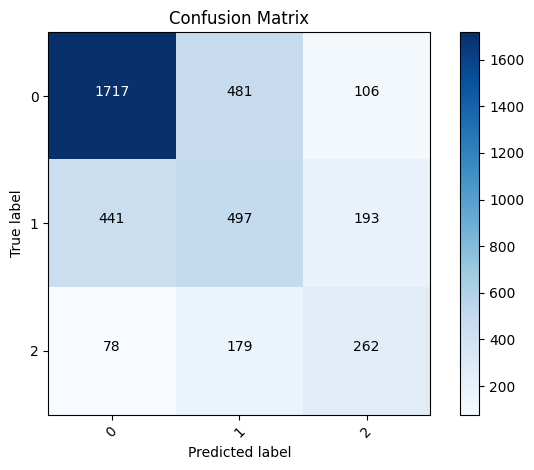

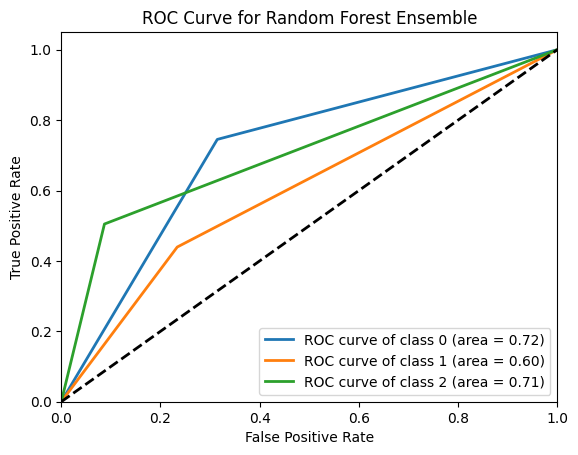

Class: 0
F1 Score: 0.7563876651982379
Precision: 0.7678890876565295
Recall: 0.7452256944444444
Class: 1
F1 Score: 0.4344405594405594
Precision: 0.42955920484010374
Recall: 0.4394341290893015
Class: 2
F1 Score: 0.48518518518518516
Precision: 0.46702317290552586
Recall: 0.5048169556840078
Mean test accuracy for feature 3: 0.6257966616084978 

Mean test accuracy for feature 1: 0.582701062215478
Mean test accuracy for feature 2: 0.32448153768335863
Mean test accuracy for feature 3: 0.6256954982296409
Mean test accuracy for feature 4: 0.5144157814871017
Mean test accuracy for feature 5: 0.5763783510369246
Mean test accuracy for feature 6: 0.2994436014162873
Mean test accuracy for feature 7: 0.6257966616084978
Mean test accuracy across all features: 0.5069874990967556


In [52]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.stats import mode
import itertools
from itertools import cycle

# Define the parameters for k-fold cross-validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Function to scale data within each fold
def scale_fold_data(X_train_fold, X_test_fold):
    """
    Scale the training and testing data within each fold using MinMaxScaler.

    Parameters:
    - X_train_fold: numpy array of shape (n_samples_train, n_features), representing the training data of a fold.
    - X_test_fold: numpy array of shape (n_samples_test, n_features), representing the testing data of a fold.

    Returns:
    - scaled_X_train_fold: numpy array of the same shape as X_train_fold, with scaled features.
    - scaled_X_test_fold: numpy array of the same shape as X_test_fold, with scaled features.
    - scaler: MinMaxScaler object fitted on X_train_fold.
    """
    scaler = MinMaxScaler()
    scaled_X_train_fold = scaler.fit_transform(X_train_fold)
    scaled_X_test_fold = scaler.transform(X_test_fold)
    return scaled_X_train_fold, scaled_X_test_fold, scaler

# Initialize lists to store accuracy scores for each fold
train_accuracy_scores = []
test_accuracy_scores = []
trained_models = []  # Store trained models for testing later
train_accuracy_per_class = {0: [], 1: [], 2: []}  # Store accuracy per class for training
test_accuracy_per_class = {0: [], 1: [], 2: []}   # Store accuracy per class for testing

# Assuming you have 7 features and Y_train is your target array for Logistic Regression
n_features = 7
n_samples = Y_train.shape[0]

# Initialize the placeholder for out-of-fold predictions
X_train_meta = np.zeros((n_samples, n_features))
Y_train_meta = Y_train.copy()  # This is just your original target array, not modified as it keeps the same order

# Iterate over each feature and perform k-fold cross-validation
for i, X_feature in enumerate(split_X_train):
    print(f"Training and validation Random Forest for feature {i + 1}...")
    fold_scores = []
    models_for_feature = []  # Store models trained for each fold

    # Temporary array to hold the fold predictions for the current feature
    fold_predictions = np.zeros(n_samples)
    
    for train_index, test_index in skf.split(X_feature, Y_train):
        X_fold_train, X_fold_test = X_feature[train_index], X_feature[test_index]
        Y_fold_train, Y_fold_test = Y_train[train_index], Y_train[test_index]
        
        # Apply random oversampling to the minority class and random undersampling to the majority class
        desired_ratios_oversampling = {0: sum(Y_fold_train == 0), 1: sum(Y_fold_train == 1)+1000, 2: 3000}
        desired_ratios_undersampling = {0: 5000, 1: sum(Y_fold_train == 1), 2: 3000}
        oversampler = RandomOverSampler(sampling_strategy=desired_ratios_oversampling, random_state=42)
        undersampler = RandomUnderSampler(sampling_strategy=desired_ratios_undersampling, random_state=42)

        print(f"The distribution of classes in the Y_fold_train before any upsampling and undersampling is: \n class 0: {sum(Y_fold_train == 0)} \n class 1: {sum(Y_fold_train == 1)} \n class 2: {sum(Y_fold_train == 2)} \n")

        # Scale the data within the fold
        X_fold_train_scaled, X_fold_test_scaled, _ = scale_fold_data(X_fold_train.reshape(-1, 30), X_fold_test.reshape(-1, 30))
        
        X_fold_train_resampled, Y_fold_train_resampled = oversampler.fit_resample(X_fold_train_scaled, Y_fold_train)
        print(f'The distribution of classes in the Y_fold_train after oversampling is: \n class 0: {sum(Y_fold_train_resampled == 0)} \n class 1: {sum(Y_fold_train_resampled == 1)} \n class 2: {sum(Y_fold_train_resampled == 2)} \n')
        # Before we had: X_fold_train_resampled, Y_fold_train_resampled = oversampler.fit_resample(X_fold_train_scaled.reshape(-1, 30), Y_fold_train)
        # X_fold_train_resampled, Y_fold_train_resampled = undersampler.fit_resample(X_fold_train_resampled, Y_fold_train_resampled)

        print(f'The distribution of classes in the Y_fold_train after undersampling is: \n class 0: {sum(Y_fold_train_resampled == 0)} \n class 1: {sum(Y_fold_train_resampled == 1)} \n class 2: {sum(Y_fold_train_resampled == 2)} \n')
        
        # Train the Random Forest classifier
        rf_classifier.fit(X_fold_train_resampled, Y_fold_train_resampled)
        
        # Store the trained model for later testing
        models_for_feature.append(rf_classifier)

        # Make predictions on the test set
        # Reshape the test set to 2D first
        X_fold_test_2d = X_fold_test_scaled.reshape(X_fold_test_scaled.shape[0], -1)
        Y_fold_pred = rf_classifier.predict(X_fold_test_2d)

        # Store the fold predictions in the corresponding positions of the fold_predictions array
        fold_predictions[test_index] = Y_fold_pred
        
        # Calculate accuracy for this fold
        fold_accuracy = accuracy_score(Y_fold_test, Y_fold_pred)
        fold_scores.append(fold_accuracy)

        # Calculate accuracy per class for this fold
        for cls in range(3):
            correct_preds_cls = np.logical_and(Y_fold_test == cls, Y_fold_pred == cls).sum()
            total_cls = (Y_fold_test == cls).sum()
            if total_cls > 0:
                class_accuracy = correct_preds_cls / total_cls
            else:
                class_accuracy = 0
            if i == 0:
                train_accuracy_per_class[cls].append(class_accuracy)
            else:
                test_accuracy_per_class[cls].append(class_accuracy)
    
    # Calculate and store the mean accuracy across all folds for this feature
    mean_accuracy = np.mean(fold_scores)
    train_accuracy_scores.append(mean_accuracy)
    # Store the trained models for this feature
    trained_models.append(models_for_feature)

    # After collecting all fold predictions for the current feature, store them in X_train_meta
    X_train_meta[:, i] = fold_predictions

    print(f"Mean accuracy for feature {i + 1}: {mean_accuracy} \n")

# Print the mean accuracy scores for each feature
for i, train_accuracy in enumerate(train_accuracy_scores):
    print(f"Mean training accuracy for feature {i + 1}: {train_accuracy}")

# Print the accuracy per class for training data
print("\n Accuracy per class for training data:")
for cls, acc_list in train_accuracy_per_class.items():
    print(f"Class {cls}: {np.mean(acc_list)}")


def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def test_models(models, X_test, Y_test, scalers):
    """
    Test the trained models on the test data and collect their predictions.

    Parameters:
    - models: list of trained models, one for each feature
    - X_test: list of numpy arrays, each representing test data for a single feature
    - Y_test: numpy array of true labels for the test data
    - scalers: list of scalers used for scaling the test data

    Returns:
    - test_scores: list of accuracy scores for each model
    - all_predictions: array of predictions from each model for each sample
    """

    test_scores = []
    all_predictions = []  # This will store the predictions of each model for each sample
    class_accuracies = []  # To store class-specific accuracies for each model

    for i, models_for_feature in enumerate(models):
        print(f"Testing model for feature {i + 1}...")
        feature_scores = []
        feature_predictions = []
        feature_class_accuracies = []

        for model in models_for_feature:
            # Scale the test data using the same scaler used for training
            X_feature_test_scaled = scalers[i].transform(X_test[i].reshape(-1, 1)).reshape(X_test[i].shape[0], -1)
            Y_pred = model.predict(X_feature_test_scaled)
            # Let's plot the confusion matrix for the last model
            if i == 6:
                cm = confusion_matrix(Y_test, Y_pred)
                print(cm)
                plt.figure()
                plot_confusion_matrix(cm, classes=[0, 1, 2])
                
                # Let's compute the one vs all AUROC and plot the 3 ROC curves on the same plot

                # Binarize the output
                y = label_binarize(Y_test, classes=[0, 1, 2])
                n_classes = y.shape[1]

                # Compute ROC curve and ROC area for each class
                fpr = dict()
                tpr = dict()
                roc_auc = dict()
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y[:, i], Y_pred == i)
                    roc_auc[i] = auc(fpr[i], tpr[i])

                # Plot all ROC curves
                plt.figure()
                lw = 2
                for i in range(n_classes):
                    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
                plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title('ROC Curve for Random Forest Ensemble')
                plt.legend(loc="lower right")
                plt.show()
                # Calculate F1 score, precision, and recall for each class
                f1_scores = []
                precisions = []
                recalls = []
                for class_label in range(3):
                    class_true = (Y_test == class_label)
                    class_predicted = (Y_pred == class_label)
                    f1_class = f1_score(class_true, class_predicted)
                    precision_class = precision_score(class_true, class_predicted)
                    recall_class = recall_score(class_true, class_predicted)
                    f1_scores.append(f1_class)
                    precisions.append(precision_class)
                    recalls.append(recall_class)

                # Print F1 score, precision, and recall for each class
                for class_label, f1_class, precision_class, recall_class in zip(range(3), f1_scores, precisions, recalls):
                    print("Class:", class_label)
                    print("F1 Score:", f1_class)
                    print("Precision:", precision_class)
                    print("Recall:", recall_class)

            # Calculate accuracy for this model
            accuracy = accuracy_score(Y_test, Y_pred)
            feature_scores.append(accuracy)

            # Collect predictions for weighted voting
            feature_predictions.append(Y_pred)

            # Calculate class-specific accuracies
            cm = confusion_matrix(Y_test, Y_pred)
            class_accuracy = cm.diagonal() / cm.sum(axis=1)
            feature_class_accuracies.append(dict(enumerate(class_accuracy)))
        
        # Calculate the mean accuracy across all folds for this feature
        mean_accuracy = np.mean(feature_scores)
        test_scores.append(mean_accuracy)
        print(f"Mean test accuracy for feature {i + 1}: {mean_accuracy} \n")
    
        feature_predictions = np.array(feature_predictions)
        mode_predictions = mode(feature_predictions, axis=0)[0].flatten()
        all_predictions.append(mode_predictions)

        # Store class-specific accuracies for this feature
        class_accuracies.append(feature_class_accuracies)
    
    all_predictions = np.array(all_predictions).T
    
    return test_scores, all_predictions, class_accuracies

# Test the trained models on the test data
test_accuracy_scores, all_predictions, class_accuracies = test_models(trained_models, split_X_test, Y_test, scalers=original_scalers)

# Print the test accuracy scores for each feature
for i, test_accuracy in enumerate(test_accuracy_scores):
    print(f"Mean test accuracy for feature {i + 1}: {test_accuracy}")

# Print the mean test accuracy across all features
mean_test_accuracy = np.mean(test_accuracy_scores)
print(f"Mean test accuracy across all features: {mean_test_accuracy}")


### Logistic Regression Meta Model

In [449]:
# Train a meta-model on the out-of-fold predictions

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train_meta = X_train_meta.astype(int)
print(X_train_meta.shape)
print(Y_train_meta.shape)
print(all_predictions.shape)
print(Y_test.shape)
X_test_meta = all_predictions.astype(int)
Y_test_meta = Y_test

# Initialize your logistic regression model (assuming it's already trained)
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)


# Train the meta-model on the out-of-fold predictions
meta_model.fit(X_train_meta, Y_train_meta)

# Predict on the test meta-features
meta_predictions = meta_model.predict(X_test_meta)

# Evaluate the meta-model
meta_accuracy = accuracy_score(Y_test_meta, meta_predictions)
print(f'Meta-Model Accuracy: {meta_accuracy}')



(15816, 7)
(15816,)
(3954, 7)
(3954,)
Meta-Model Accuracy: 0.6244309559939302


### Weighted Voting Scheme

In [399]:
import numpy as np

# Initialize a matrix for weighted votes
weighted_votes = np.zeros((all_predictions.shape[0], 3))  # Assuming there are 3 classes

# Iterate over each sample and model prediction
for i in range(all_predictions.shape[0]):  # For each sample
    for j in range(all_predictions.shape[1]):  # For each feature/model
        predicted_class = all_predictions[i, j]
        # Here, we adjust to use the new class_accuracies structure
        # class_accuracies[j] is a list of dictionaries for each model for the jth feature
        # Since we're now working with an ensemble of features, not models per feature, we adjust the logic:
        # Assume a single model per feature for simplicity, so we access the 0th index for now
        model_class_accuracies = class_accuracies[j][0]  # This would need adjustment if you have multiple models per feature
        weight = model_class_accuracies.get(predicted_class, 0)  # Using .get to provide a default value if key is missing
        weighted_votes[i, predicted_class] += weight

# Determine final predictions based on adjusted weighted votes
final_predictions_adjusted = np.argmax(weighted_votes, axis=1)

# Evaluate the adjusted final predictions
final_accuracy_adjusted = accuracy_score(Y_test, final_predictions_adjusted)
print(f"Adjusted final model's accuracy: {final_accuracy_adjusted}")



Adjusted final model's accuracy: 0.6011633788568538


# LSTM

### Splitting the data and initialising scalers for testing

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Concatenate all the elements from the X list

X = np.array(X)
Y = np.array(Y)
print(f"The shape of X as a numpy array is: {X.shape}")
print(f"The shape of Y as a numpy array is: {Y.shape}")

# Now we perform test train split before we scale the data so we don't have a data leakage problem

test_size = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state=42)

print(f"The shape of X_train as a numpy array is: {X_train.shape} considering a test size of {test_size}")
print(f"The shape of Y_train as a numpy array is: {Y_train.shape} considering a test size of {test_size}")

# Now we can use the scale function only to store the scalers used, so we can apply them when testing the data
# Otherwise the scalling will happen on k-1 folds in training and the last fold used for cross-validation will be scaled with the same scaler

def scale_columns(X_train):
    """
    Scale each column with respect to its own data using MinMaxScaler.

    Parameters:
    - X: numpy array of shape (n_samples, n_timesteps, n_features), representing the combined data from all stocks.

    Returns:
    - scaled_X: numpy array of the same shape as input, with each column scaled
    - scalers: a list of MinMaxScaler objects, one for each column
    """
    scalers = []
    scaled_X = np.zeros_like(X_train)

    for i in range(X.shape[2]):
        scaler = MinMaxScaler()
        column_data = X_train[:, :, i].reshape(-1, 1)
        scaled_column = scaler.fit_transform(column_data).reshape(X_train.shape[:2])
        scaled_X[:, :, i] = scaled_column
        scalers.append(scaler)

    return scaled_X, scalers


_, original_scalers = scale_columns(X_train=X_train)

The shape of X as a numpy array is: (19770, 30, 7)
The shape of Y as a numpy array is: (19770,)
The shape of X_train as a numpy array is: (15816, 30, 7) considering a test size of 0.2
The shape of Y_train as a numpy array is: (15816,) considering a test size of 0.2


Fold 1
Class distribution in Fold 1: Counter({0: 5997, 1: 3169, 2: 1378})
Class distribution after resampling in Fold 1: Counter({0: 5997, 1: 5997, 2: 5997})
Epoch [1/30], Training Loss: 0.8751, Validation Loss: 0.6046, Validation Accuracy: 71.55%
Epoch [2/30], Training Loss: 0.6437, Validation Loss: 0.8906, Validation Accuracy: 53.30%
Epoch [3/30], Training Loss: 0.6070, Validation Loss: 0.6916, Validation Accuracy: 65.53%
Epoch [4/30], Training Loss: 0.5625, Validation Loss: 0.4684, Validation Accuracy: 80.84%
Epoch [5/30], Training Loss: 0.5263, Validation Loss: 0.5862, Validation Accuracy: 72.02%
Epoch [6/30], Training Loss: 0.5009, Validation Loss: 0.4187, Validation Accuracy: 80.94%
Epoch [7/30], Training Loss: 0.4923, Validation Loss: 0.4888, Validation Accuracy: 78.60%
Epoch [8/30], Training Loss: 0.4815, Validation Loss: 0.4474, Validation Accuracy: 80.39%
Epoch [9/30], Training Loss: 0.4675, Validation Loss: 0.4456, Validation Accuracy: 79.55%
Epoch [10/30], Training Loss: 0.

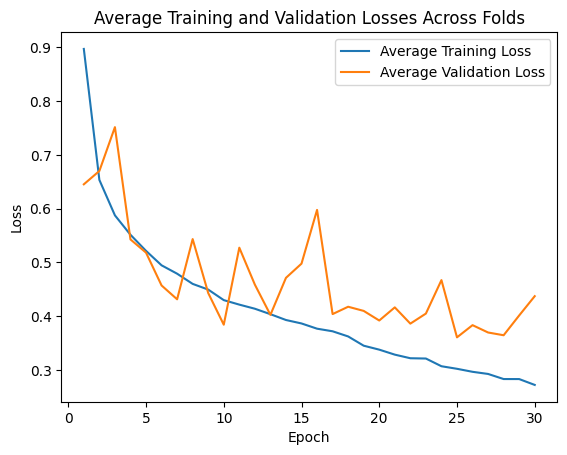

Average Accuracy across folds: 79.66%
Test Accuracy: 0.8467


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
import numpy as np

# Defining the LSTM model class

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Convert data to PyTorch tensors
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state=42, stratify=Y)
_, original_scalers = scale_columns(X_train=X_train) # Scaler used for test data

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)


# Define hyperparameters
input_size = X.shape[2]  # Number of features
hidden_size = 50  # Number of features in hidden state
num_layers = 2  # Number of stacked LSTM layers
num_classes = len(torch.unique(Y_train_tensor))  # Number of output classes
learning_rate = 0.001
batch_size = 32
n_epochs = 30
n_splits = 3  # Number of folds in KFold

best_model_state = None
highest_accuracy = 0

# Set up k-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform k-fold cross-validation
fold_accuracies = []
Y_train_numpy = Y_train_tensor.numpy().ravel()
train_loss_dict = {}
fold_losses_training = []
fold_losses_validation = []
### Performing training and cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_tensor.numpy(), Y_train_numpy)):
    train_plot_losses = []
    val_plot_losses = []


    current_fold_accuracies = []
    print(f'Fold {fold+1}')

    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train_tensor[train_idx], X_train_tensor[val_idx]
    Y_train_fold, Y_val_fold = Y_train_tensor[train_idx], Y_train_tensor[val_idx]

    # Print class distribution
    class_distribution = Counter(Y_train_fold.numpy())
    print(f"Class distribution in Fold {fold+1}: {class_distribution}")

    # Assuming X_train_fold and Y_train_fold have already been defined
    ros = RandomOverSampler(random_state=42)
    X_train_fold_reshaped = X_train_fold.numpy().reshape(X_train_fold.shape[0], -1)  # Flatten X_train_fold
    Y_train_fold_np = Y_train_fold.numpy()  # Convert Y_train_fold to NumPy array for processing

    # Perform oversampling
    X_train_fold_resampled, Y_train_fold_resampled = ros.fit_resample(X_train_fold_reshaped, Y_train_fold_np)

    # Reshape X_train_fold back to its original shape
    X_train_fold_resampled = X_train_fold_resampled.reshape(-1, X_train_fold.shape[1], X_train_fold.shape[2])

    # Convert the resampled data back to tensors
    X_train_fold_resampled = torch.tensor(X_train_fold_resampled, dtype=torch.float32)
    Y_train_fold_resampled = torch.tensor(Y_train_fold_resampled, dtype=torch.long)

    print(f"Class distribution after resampling in Fold {fold+1}: {Counter(Y_train_fold_resampled.numpy())}")

    # Scale data within each fold
    scalers = [MinMaxScaler() for _ in range(X_train_fold_resampled.size(-1))]
    for i, scaler in enumerate(scalers):
        column_data = X_train_fold_resampled[:, :, i].reshape(-1, 1)
        scaled_column = scaler.fit_transform(column_data).reshape(X_train_fold_resampled.shape[:2])
        X_train_fold_resampled[:, :, i] = torch.tensor(scaled_column)
        column_data_val = X_val_fold[:, :, i].reshape(-1, 1)
        scaled_column_val = scaler.transform(column_data_val).reshape(X_val_fold.shape[:2])
        X_val_fold[:, :, i] = torch.tensor(scaled_column_val)

    # Create DataLoaders for the current fold
    train_dataset = torch.utils.data.TensorDataset(X_train_fold_resampled, Y_train_fold_resampled)
    val_dataset = torch.utils.data.TensorDataset(X_val_fold, Y_val_fold)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize the model
    model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(n_epochs):
        model.train()  # Ensure the model to training mode
        total_train_loss = 0
        total_val_loss = 0

        for i, (inputs, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_train_loss += loss.item()
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        avg_train_loss = total_train_loss / len(train_loader)
        train_plot_losses.append(avg_train_loss)

        # Validation of the model
        model.eval()  # Set the model to evaluation mode
        correct = 0
        total = 0
        print_every = 50
        val_iter = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                # # Optionally print predictions
                # if val_iter % print_every == 0:
                #     for j in range(len(labels)):
                #         print(f'Predicted in val: {predicted[j].item()}, True in val: {labels[j].item()}')
                # val_iter += 1
        
        avg_val_loss = total_val_loss / len(val_loader)
        val_plot_losses.append(avg_val_loss)
        epoch_accuracy = 100 * correct / total
        fold_accuracies.append(epoch_accuracy)
        current_fold_accuracies.append(epoch_accuracy)

        print(f'Epoch [{epoch+1}/{n_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {epoch_accuracy:.2f}%')

    # Save the best model

    if epoch_accuracy > highest_accuracy:
        highest_accuracy = epoch_accuracy
        best_model_state = model.state_dict()
    fold_losses_training.append(train_plot_losses)
    fold_losses_validation.append(val_plot_losses)

    print(f'Accuracy of fold {fold+1}: {np.mean(current_fold_accuracies):.2f}%')

# Plot training and validation losses

# Initialize a list to store the average training loss for each epoch
average_train_losses_plot = []
average_val_losses_plot = []

# Calculate the average training loss for each epoch across all folds
for epoch in range(n_epochs):
    epoch_losses_training = [fold[epoch] for fold in fold_losses_training]
    epoch_losses_validation = [fold[epoch] for fold in fold_losses_validation]
    average_epoch_loss_training = np.mean(epoch_losses_training)
    average_epoch_loss_validation = np.mean(epoch_losses_validation)
    average_train_losses_plot.append(average_epoch_loss_training)
    average_val_losses_plot.append(average_epoch_loss_validation)

# Plot the average training loss across all folds for each epoch
plt.plot(range(1, n_epochs + 1), average_train_losses_plot, label='Average Training Loss')
plt.plot(range(1, n_epochs + 1), average_val_losses_plot, label='Average Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Training and Validation Losses Across Folds')
plt.legend()
plt.show()
average_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy across folds: {average_accuracy:.2f}%')

### Test the model on the test data

# Scaling the test data first using the original scalers from the training data
def scale_test_data(X_test, original_scalers):
    X_test_scaled = np.zeros_like(X_test)

    for i in range(X_test.shape[2]):
        column_data = X_test[:, :, i].reshape(-1, 1)
        scaled_column = original_scalers[i].transform(column_data).reshape(X_test.shape[:2])
        X_test_scaled[:, :, i] = scaled_column
    
    return X_test_scaled

X_test_scaled_tensor = scale_test_data(X_test_tensor, original_scalers)
X_test_scaled_tensor = torch.tensor(X_test_scaled_tensor, dtype=torch.float32)

# Initialize the best model with the same architecture
best_model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)

# Load the best model state
best_model.load_state_dict(best_model_state)

def test_model(model, X_test_scaled_tensor, Y_test_tensor):
    """Evaluate the model on the test set."""
    model.eval()  # Set the model to evaluation mode
    # test_loader = DataLoader(TensorDataset(X_test_scaled_tensor, Y_test_tensor), batch_size=batch_size, shuffle=False)
    
    correct = 0
    total = 0
    with torch.no_grad():
        # for X_batch, Y_batch in test_loader:
        #     outputs = model(X_batch)
        #     _, predicted = torch.max(outputs.data, 1)
        #     total += Y_batch.size(0)
        #     correct += (predicted == Y_batch).sum().item()
        #     print(predicted, Y_batch)
        outputs = model(X_test_scaled_tensor)
        _, predicted = torch.max(outputs.data, 1)
        total = Y_test_tensor.size(0)
        correct = (predicted == Y_test_tensor).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    
test_model(model = best_model, X_test_scaled_tensor = X_test_scaled_tensor, Y_test_tensor = Y_test_tensor)


## Evaluation Metrics (ran after LSTM Code)

0.069410495 [0]
0.07743145 [0]
0.043306462 [0]
0.9217842 [0]
0.6252804 [0]
0.5679431 [0]
0.03249956 [1]
0.0058170757 [0]
0.114010625 [0]
2.8728477e-05 [0]


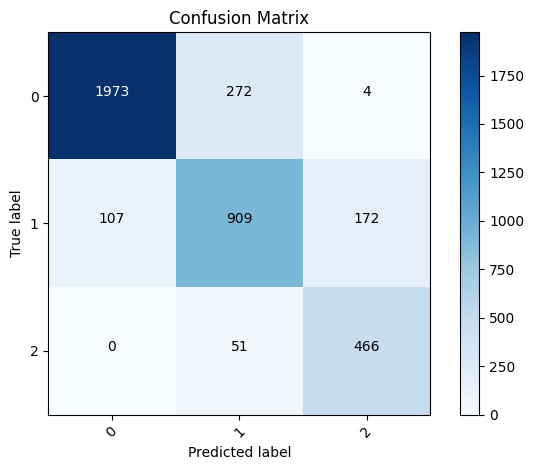

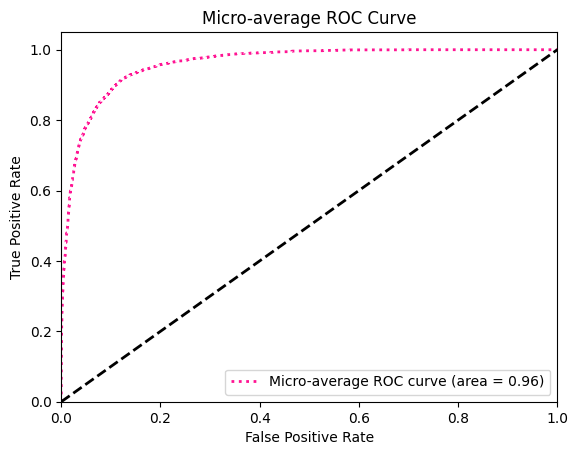

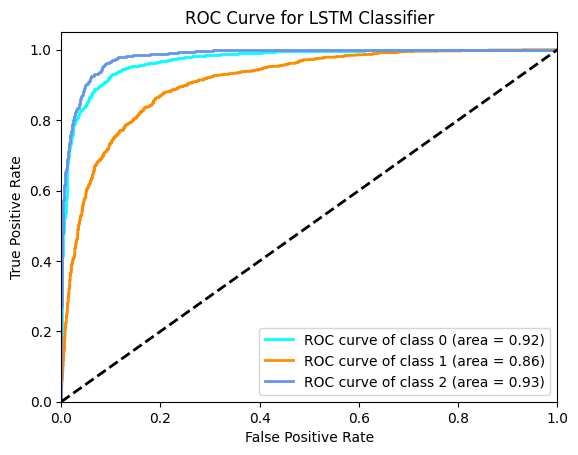

F1 Score: 0.8223026940808728
Precision: 0.8040796884838941
Recall: 0.8479280903029519
Class: 0
F1 Score: 0.9115269115269116
Precision: 0.9485576923076923
Recall: 0.8772787905735883
Class: 1
F1 Score: 0.7512396694214876
Precision: 0.7378246753246753
Recall: 0.7651515151515151
Class: 2
F1 Score: 0.8041415012942191
Precision: 0.7258566978193146
Recall: 0.9013539651837524


In [55]:
import torch
import torch.nn as nn
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
import itertools
from itertools import cycle

# Define functions for computing and plotting metrics

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def plot_roc_curve(Y_true, Y_pred_prob, n_classes):
    # Binarize the labels
    Y_true_binarized = label_binarize(Y_true, classes=np.arange(n_classes))
    for i in range(10):
        print(Y_pred_prob[i, 1], Y_true_binarized[[i],1])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_true_binarized[:, i], Y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_true_binarized.ravel(), Y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Plot the micro-average ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color = 'deeppink', lw = lw, label = 'Micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]), linestyle=':')
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Micro-average ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC curve
    plt.figure()
    lw = 2
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for LSTM Classifier')
    plt.legend(loc="lower right")
    plt.show()


# Define function to compute F1 score, precision, and recall
def compute_metrics(Y_true, Y_pred):
    f1 = f1_score(Y_true, Y_pred, average='macro')
    precision = precision_score(Y_true, Y_pred, average='macro')
    recall = recall_score(Y_true, Y_pred, average='macro')
    return f1, precision, recall

# Rest of the code remains the same until the end

# Calculate and plot confusion matrix
Y_pred = best_model(X_test_scaled_tensor)
_, predicted = torch.max(Y_pred, 1)
cm = confusion_matrix(Y_test_tensor.numpy(), predicted.numpy())
plt.figure()
plot_confusion_matrix(cm, classes=[0, 1, 2])


# Calculate and plot ROC curve
Y_pred_prob = nn.functional.softmax(Y_pred, dim=1)
plot_roc_curve(Y_test_tensor.numpy(), Y_pred_prob.detach().numpy(), n_classes=num_classes)

# Calculate F1 score, precision, and recall
f1, precision, recall = compute_metrics(Y_test_tensor.numpy(), predicted.numpy())
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate F1 score, precision, and recall for each class
f1_scores = []
precisions = []
recalls = []
for class_label in range(num_classes):
    class_true = (Y_test_tensor.numpy() == class_label)
    class_predicted = (predicted.numpy() == class_label)
    f1_class = f1_score(class_true, class_predicted)
    precision_class = precision_score(class_true, class_predicted)
    recall_class = recall_score(class_true, class_predicted)
    f1_scores.append(f1_class)
    precisions.append(precision_class)
    recalls.append(recall_class)

# Print F1 score, precision, and recall for each class
for class_label, f1_class, precision_class, recall_class in zip(range(num_classes), f1_scores, precisions, recalls):
    print("Class:", class_label)
    print("F1 Score:", f1_class)
    print("Precision:", precision_class)
    print("Recall:", recall_class)


### Hyperparameter tuning

In [503]:
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Defining the LSTM model class

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Convert data to PyTorch tensors
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state=42, stratify=Y)
_, original_scalers = scale_columns(X_train=X_train) # Scaler used for test data

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)


# Define hyperparameters
input_size = X.shape[2]  # Number of features
hidden_sizes = [50]  # Number of features in hidden state
num_layers = 2  # Number of stacked LSTM layers
num_classes = len(torch.unique(Y_train_tensor))  # Number of output classes
learning_rates = [0.0001, 0.001]
batch_sizes = [32, 64]
n_epochs = [20, 30] 
n_splits = 3  # Number of folds in KFold

# Placeholder for best model and its accuracy
best_overall_model = None
highest_accuracy = 0
best_params = {}

# Perform grid search
for lr, hs, bs, n_e in itertools.product(learning_rates, hidden_sizes, batch_sizes, n_epochs):
    print(f"Training with lr: {lr}, hs: {hs}, bs: {bs}, n_e: {n_e}")
    
    # Reset the highest accuracy for each hyperparameter combination
    fold_accuracies = []
    highest_current_model_accuracy = 0

    
    # KFold cross-validation setup
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    Y_train_numpy = Y_train_tensor.numpy().ravel()

    best_model = None

    ### Performing training and cross-validation loop
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_tensor.numpy(), Y_train_numpy)):
        current_fold_accuracies = []
        print(f'Fold {fold+1}')

        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X_train_tensor[train_idx], X_train_tensor[val_idx]
        Y_train_fold, Y_val_fold = Y_train_tensor[train_idx], Y_train_tensor[val_idx]

        # Print class distribution
        class_distribution = Counter(Y_train_fold.numpy())
        # print(f"Class distribution in Fold {fold+1}: {class_distribution}")

        # Assuming X_train_fold and Y_train_fold have already been defined
        ros = RandomOverSampler(random_state=42)
        X_train_fold_reshaped = X_train_fold.numpy().reshape(X_train_fold.shape[0], -1)  # Flatten X_train_fold
        Y_train_fold_np = Y_train_fold.numpy()  # Convert Y_train_fold to NumPy array for processing

        # Perform oversampling
        X_train_fold_resampled, Y_train_fold_resampled = ros.fit_resample(X_train_fold_reshaped, Y_train_fold_np)

        # Reshape X_train_fold back to its original shape
        X_train_fold_resampled = X_train_fold_resampled.reshape(-1, X_train_fold.shape[1], X_train_fold.shape[2])

        # Convert the resampled data back to tensors
        X_train_fold_resampled = torch.tensor(X_train_fold_resampled, dtype=torch.float32)
        Y_train_fold_resampled = torch.tensor(Y_train_fold_resampled, dtype=torch.long)

        # print(f"Class distribution after resampling in Fold {fold+1}: {Counter(Y_train_fold_resampled.numpy())}")

        # Scale data within each fold
        scalers = [MinMaxScaler() for _ in range(X_train_fold_resampled.size(-1))]
        for i, scaler in enumerate(scalers):
            column_data = X_train_fold_resampled[:, :, i].reshape(-1, 1)
            scaled_column = scaler.fit_transform(column_data).reshape(X_train_fold_resampled.shape[:2])
            X_train_fold_resampled[:, :, i] = torch.tensor(scaled_column)
            column_data_val = X_val_fold[:, :, i].reshape(-1, 1)
            scaled_column_val = scaler.transform(column_data_val).reshape(X_val_fold.shape[:2])
            X_val_fold[:, :, i] = torch.tensor(scaled_column_val)

        # Create DataLoaders for the current fold
        train_dataset = torch.utils.data.TensorDataset(X_train_fold_resampled, Y_train_fold_resampled)
        val_dataset = torch.utils.data.TensorDataset(X_val_fold, Y_val_fold)
        train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
        val_loader = DataLoader(dataset=val_dataset, batch_size=bs, shuffle=False)

        # Initialize the model
        model = LSTMClassifier(input_size, hs, num_layers, num_classes)

        # Loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        best_fold_accuracy = 0
        # Train the model
        for epoch in range(n_e):
            model.train()  # Ensure the model to training mode
            total_train_loss = 0
            total_val_loss = 0

            for i, (inputs, labels) in enumerate(train_loader):
                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_train_loss += loss.item()
                
                # Backward pass and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            avg_train_loss = total_train_loss / len(train_loader)

            # Validation of the model
            model.eval()  # Set the model to evaluation mode
            correct = 0
            total = 0
            print_every = 50
            val_iter = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    total_val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
            
            avg_val_loss = total_val_loss / len(val_loader)
            epoch_accuracy = 100 * correct / total
            current_fold_accuracies.append(epoch_accuracy)

            if epoch_accuracy > best_fold_accuracy:
                best_fold_accuracy = epoch_accuracy
                best_model = model

            print(f'Epoch [{epoch+1}/{n_e}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {epoch_accuracy:.2f}%')

        # # Save the best model
        # if best_fold_accuracy>highest_current_model_accuracy:
        #     highest_current_model_accuracy = best_fold_accuracy
        #     best_model = best_model

        fold_accuracies.append(best_fold_accuracy)
        print(f'Accuracy of fold {fold+1}: {np.mean(current_fold_accuracies):.2f}%')

    print(f'Accuracy of current model is: {np.mean(fold_accuracies):.2f}% with params: lr: {lr}, hs: {hs}, bs: {bs}, n_e: {n_e}')

    if np.mean(fold_accuracies) > highest_accuracy:
        highest_accuracy = np.mean(fold_accuracies)
        best_params = {"learning rate": lr, "hidden size": hs, "batch size": bs, "number of epochs": n_e}

print(f'Best accuracy: {highest_accuracy:.2f}% with params: {best_params}')


Training with lr: 0.0001, hs: 50, bs: 32, n_e: 20
Fold 1
Epoch [1/20], Training Loss: 1.0919, Validation Loss: 1.0182, Validation Accuracy: 52.16%
Epoch [2/20], Training Loss: 0.9690, Validation Loss: 0.8776, Validation Accuracy: 60.00%
Epoch [3/20], Training Loss: 0.8497, Validation Loss: 0.8719, Validation Accuracy: 56.39%
Epoch [4/20], Training Loss: 0.7997, Validation Loss: 0.9065, Validation Accuracy: 52.88%
Epoch [5/20], Training Loss: 0.7665, Validation Loss: 0.8369, Validation Accuracy: 58.04%
Epoch [6/20], Training Loss: 0.7445, Validation Loss: 0.7199, Validation Accuracy: 68.06%
Epoch [7/20], Training Loss: 0.7198, Validation Loss: 0.7284, Validation Accuracy: 67.17%
Epoch [8/20], Training Loss: 0.7012, Validation Loss: 0.7554, Validation Accuracy: 64.47%
Epoch [9/20], Training Loss: 0.6854, Validation Loss: 0.6240, Validation Accuracy: 73.33%
Epoch [10/20], Training Loss: 0.6775, Validation Loss: 0.6051, Validation Accuracy: 72.29%
Epoch [11/20], Training Loss: 0.6648, Vali